## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_comb = pd.DataFrame()
mouse_study_comb = mouse_metadata.merge(study_results, how='inner')

mouse_study_comb.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_summary = pd.DataFrame()
#mean
mouse_study_summary['Mean'] = mouse_study_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#median
mouse_study_summary['Median'] = mouse_study_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#variance
mouse_study_summary['Variance'] = mouse_study_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#standard dev
mouse_study_summary['Standard Deviation'] = mouse_study_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#standard err mean
mouse_study_summary['SEM'] = mouse_study_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mouse_study_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [3]:
bar_df = mouse_study_comb[['Drug Regimen', 'Mouse ID']].groupby('Drug Regimen').count()
#bar_df.sort_values(ascending=False)
bar_df.head()
bar_df.rename(columns = {'Mouse ID':'Regimen Count'}, inplace = True)
bar_df.head()

,Regimen Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


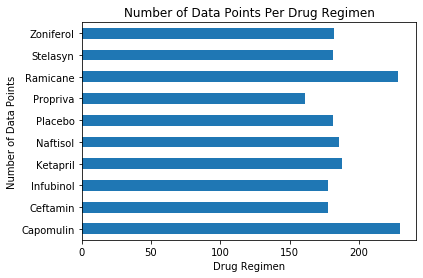

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
title='Number of Data Points Per Drug Regimen'
bar_df.plot.barh(title=title, legend=False, width = .5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

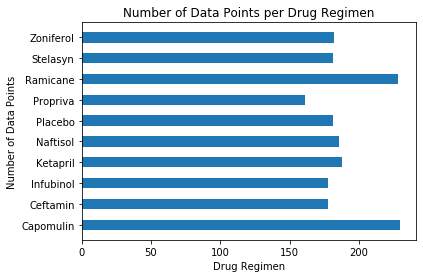

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.barh(bar_df.index, bar_df["Regimen Count"], height = .5)
plt.title('Number of Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

#could have used xticks(rotation=90) to fix instead of using barh.

## Pie plots

In [6]:
mouse_gender = mouse_study_comb['Sex'].value_counts()
mouse_gender

Male      958
Female    935
Name: Sex, dtype: int64

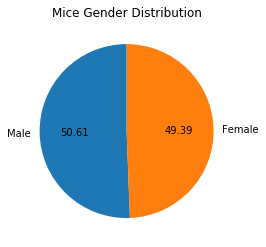

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender.plot.pie(autopct='%.2f', startangle=90)
plt.title("Mice Gender Distribution")
plt.ylabel('') #removes the 'sex' title on the side of the axis
plt.show()

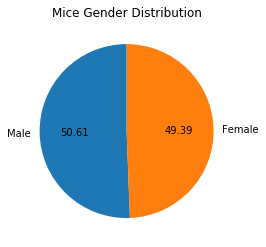

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_gender.index
plt.pie(mouse_gender, labels=labels, autopct='%.2f', startangle=90)
plt.title("Mice Gender Distribution")
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.


# Calculate the IQR and quantitatively determine if there are any potential outliers.



In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and scatter plots

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



In [13]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen

